# **Introduction**

This notebook presents a deep learning approach to Human Action Recognition (HAR) in still images. HAR is a critical computer vision task with applications ranging from surveillance and security to human-computer interaction and content-based image retrieval. While traditionally performed on video data, this project focuses on the challenging task of recognizing human actions from single, static images.

### **Project Objectives**

1.Develop a deep learning system capable of:
* Predicting the action performed by a person in an
input RGB image (40 categories)
* Determining if more than one person is present in the image

2.Analyze and evaluate the performance of the developed models

3.Provide insights into the ethical implications and
potential biases in HAR systems

# **Goal**:
Achieve atleast 75 percent accuracy in classfying
both the categories of class and morethanoneperson

### **Setting up the notebook**


* Imported Necessary Libraries
* Defined the datapath
* Loaded the datasets
*Initial data exploration








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path='/content/drive/My Drive/A1_2024_data'

Import essential libraries and load training and future datasets

In [ ]:
# Step 3: Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Step 4: Load the CSV files
train_data = pd.read_csv(os.path.join(data_path, 'train_data_2024.csv'))
future_data = pd.read_csv(os.path.join(data_path, 'future_data_2024.csv'))

Display basic statistical information about the training dataset


In [ ]:
# Step 5: Display basic information about the datasets
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FileName           4500 non-null   object
 1   Class              4500 non-null   object
 2   MoreThanOnePerson  4500 non-null   object
 3   HighLevelCategory  4500 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB
None
            FileName       Class MoreThanOnePerson         HighLevelCategory
count           4500        4500              4500                      4500
unique          4500          40                 2                        10
top     Img_8257.jpg  applauding                NO  Social_LeisureActivities
freq               1         222              2830                       866


### **Data Exploration**

My initial data exploration focused on understanding the distribution and relationships within our dataset. I visualized four key aspects:

1.**Class Distribution**: This visualization reveals the balance (or imbalance) among the 40 action categories. Understanding this distribution is crucial for interpreting model performance and potentially addressing class imbalance issues.

2.**'MoreThanOnePerson' Distribution**: By visualizing this binary attribute, we gain insight into the proportion of images containing multiple people versus those with a single person. This information is valuable for assessing the difficulty of the multiple-person detection task.

3.**Correlation between 'Class' and 'MoreThanOnePerson**': This analysis helps us understand if certain actions are more likely to involve multiple people. Such correlations could influence our model's predictions and reveal potential biases in the dataset.

4.**Distribution of 'HighLevelCategory'**: While not a primary prediction target, understanding the distribution of high-level categories provides context for the action classes and may inform feature engineering or model architecture decisions.

Distribution of Action Classes:
There's significant class imbalance, with 'applauding' being the most common action and 'washing dishes' the least common.

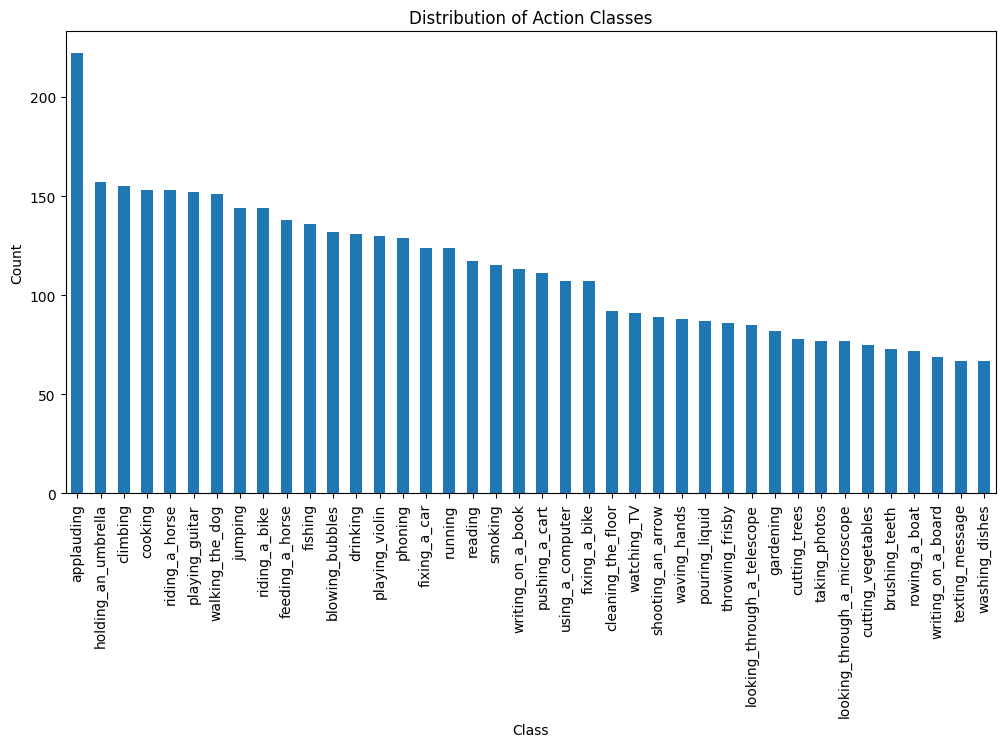

In [ ]:
# : Visualize class distribution
plt.figure(figsize=(12, 6))
train_data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Action Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Distribution of MoreThanOnePerson:
The dataset is imbalanced, with 62.9% of images containing only one person and 37.1% containing multiple people.

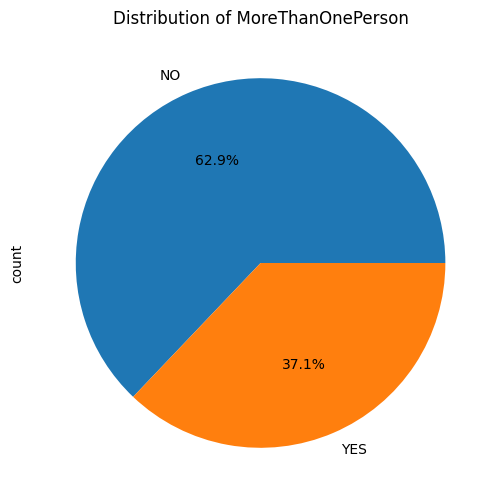

In [ ]:
#  Visualize 'MoreThanOnePerson' distribution
plt.figure(figsize=(8, 6))
train_data['MoreThanOnePerson'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of MoreThanOnePerson')
plt.show()

Correlation between Class and MoreThanOnePerson:
Some actions (e.g., applauding, pushing a cart) are strongly associated with multiple people, while others (e.g., fixing a bike, brushing teeth) typically involve a single person.

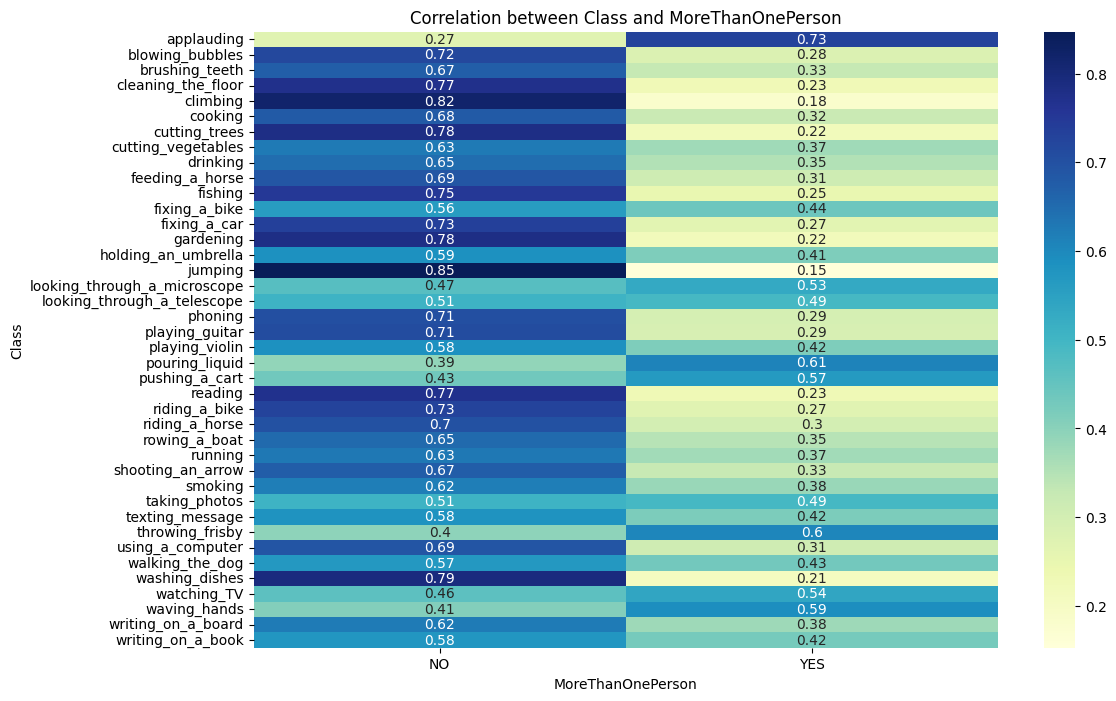

In [ ]:
# 3. Correlation between 'Class' and 'MoreThanOnePerson'
class_more_than_one = pd.crosstab(train_data['Class'], train_data['MoreThanOnePerson'])
class_more_than_one_norm = class_more_than_one.div(class_more_than_one.sum(axis=1), axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(class_more_than_one_norm, annot=True, cmap='YlGnBu')
plt.title('Correlation between Class and MoreThanOnePerson')
plt.show()

Distribution of High Level Categories:
Social leisure activities dominate the dataset, while personal care and hygiene are least represented.

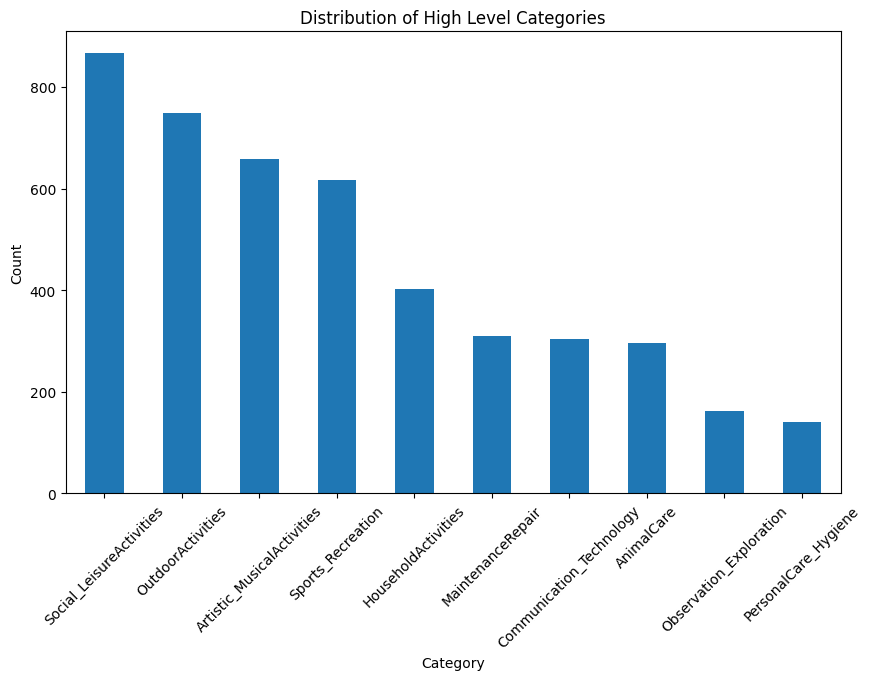

In [ ]:
# 4. Distribution of 'HighLevelCategory'
plt.figure(figsize=(10, 6))
train_data['HighLevelCategory'].value_counts().plot(kind='bar')
plt.title('Distribution of High Level Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

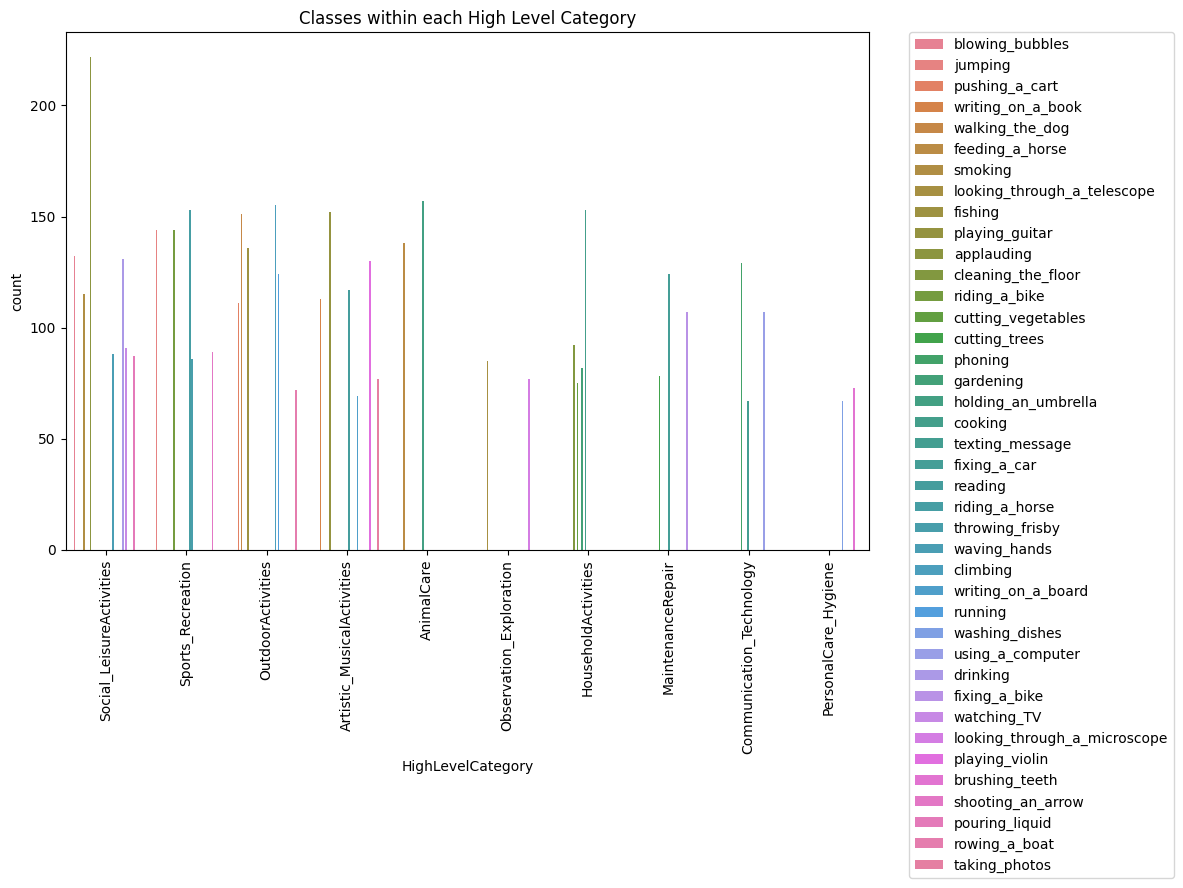

In [ ]:
# 5. Relationship between 'HighLevelCategory' and 'Class'
plt.figure(figsize=(12, 8))
sns.countplot(x='HighLevelCategory', hue='Class', data=train_data)
plt.title('Classes within each High Level Category')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### **Data Extraction and Sample Images Exploration**

This section covers the initial steps of data preparation and exploration for our Human Action Recognition project. It includes extracting image files, loading and displaying sample images, and performing basic dataset analysis.

Purpose: Extracts images from a ZIP file if not already done.

Key Points:


*   Uses a flag file to avoid redundant extractions.
*   Ensures the extraction directory exists before proceeding.


In [ ]:
import zipfile
import os

# Define the path to your ZIP file, extraction destination, and flag file
zip_path = '/content/drive/My Drive/A1_2024_data/Images.zip'
extract_path = '/content/drive/My Drive/A1_2024_data/extracted_images'
flag_file = os.path.join(extract_path, 'extraction_done.txt')

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Check if the extraction has already been done by looking for the flag file
if not os.path.exists(flag_file):
    print("Extracting images...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    # Create the flag file to indicate that extraction is done
    with open(flag_file, 'w') as f:
        f.write('Extraction complete')
    print(f"Images extracted to {extract_path}")
else:
    print(f"Images already extracted to {extract_path}")


Images already extracted to /content/drive/My Drive/A1_2024_data/extracted_images


Purpose: Displays random sample images and prints basic dataset statistics.

Key Points:

*   Loads images and their corresponding labels.
*   Shows class distribution, 'MoreThanOnePerson' distribution, and high-level category distribution.

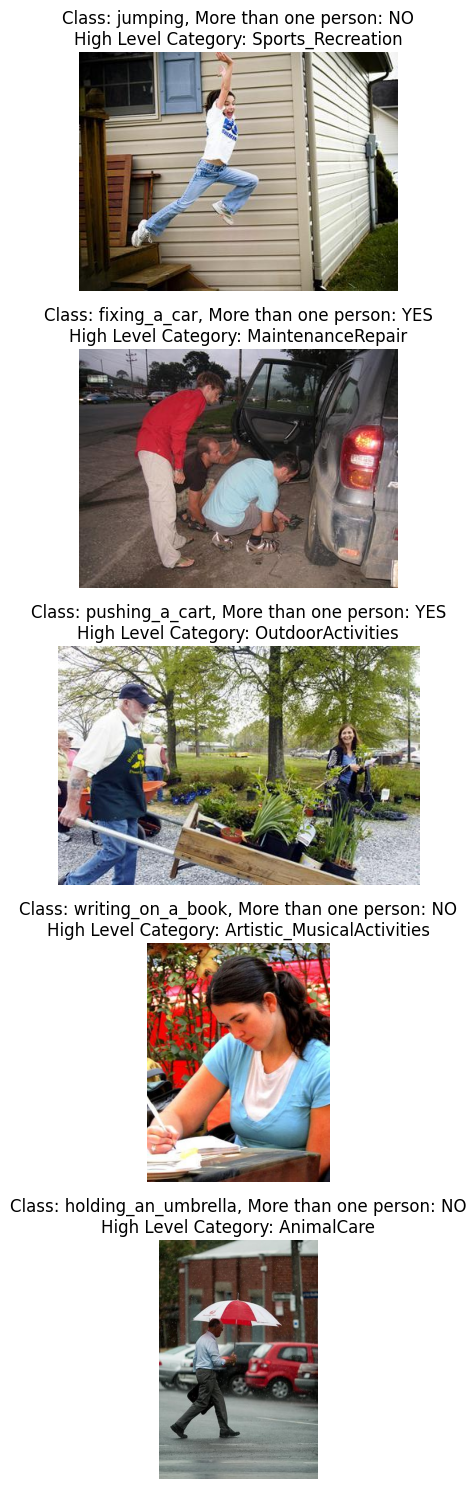

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import pandas as pd
import os

def display_sample_images(data, image_folder, num_samples=5):
    plt.figure(figsize=(15, 3*num_samples))
    samples = data.sample(num_samples)

    for i, (index, row) in enumerate(samples.iterrows()):
        # Construct the correct image path
        img_path = os.path.join(image_folder, 'Images', row['FileName'])

        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        # Load and display the image
        img = Image.open(img_path)

        plt.subplot(num_samples, 1, i+1)
        plt.imshow(img)
        plt.axis('off')

        # Display the labels
        title = f"Class: {row['Class']}, More than one person: {row['MoreThanOnePerson']}\n"
        title += f"High Level Category: {row['HighLevelCategory']}"
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Define paths
csv_path = '/content/drive/My Drive/A1_2024_data/train_data_2024.csv'
image_folder = '/content/drive/My Drive/A1_2024_data/extracted_images'

# Read the CSV file
train_data = pd.read_csv(csv_path)

# Display 5 random samples
display_sample_images(train_data, image_folder, num_samples=5)

# Print some basic statistics about the dataset
print(f"Total number of images: {len(train_data)}")
print("\nClass distribution:")
print(train_data['Class'].value_counts())
print("\n'More than one person' distribution:")
print(train_data['MoreThanOnePerson'].value_counts())
print("\nHigh Level Category distribution:")
print(train_data['HighLevelCategory'].value_counts())

In [ ]:
# Display the column names in the DataFrame
print(train_data.columns)


Index(['FileName', 'Class', 'MoreThanOnePerson', 'HighLevelCategory'], dtype='object')


Image Directory Verification-
Purpose: Verifies the contents of the image directory.
Key Points:



*   Counts total files and image files in the directory
*   Lists a few image files as a sanity check.


In [ ]:
import os

image_dir = '/content/drive/My Drive/A1_2024_data/extracted_images/Images'

# Check if the directory exists
if not os.path.exists(image_dir):
    print(f"The directory {image_dir} does not exist.")
else:
    # List the contents of the directory
    files = os.listdir(image_dir)
    image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Total files in the directory: {len(files)}")
    print(f"Image files found: {len(image_files)}")

    if len(image_files) > 0:
        print("First few image files:")
        for file in image_files[:5]:
            print(file)
    else:
        print("No image files found in the directory.")

Total files in the directory: 9532
Image files found: 9532
First few image files:
Img_3664.jpg
Img_5201.jpg
Img_3670.jpg
Img_7416.jpg
Img_8725.jpg


## **Data Preprocessing**

**Overview**
This code performs essential preprocessing steps on the image dataset for our Human Action Recognition (HAR) task. It resizes images, applies necessary transformations, and saves the preprocessed data to disk for efficient loading during model training.

**Key Components**:

*   Image resizing to 224x224 pixels
*   Applying preprocessing specific to ResNet50
*   Saving preprocessed images as NumPy arrays
*   Maintaining metadata for processed images

**Justifications**:

Image Resizing to 224x224:

1.   I chose to resize images to 224x224 pixels after initial experiments with 128x128 showed suboptimal performance. The 224x224 size is standard for many pre-trained CNN models, including ResNet50, VGG16, and EfficientNetB0. This size provides a good balance between preserving image details and computational efficiency.

2.   Preprocessing and Storing Approach:
Initially, I attempted an on-the-fly approach, preprocessing images during training. However, due to limited computational resources (GPU constraints), this method proved too slow for efficient model training. By preprocessing and storing images beforehand, we significantly reduce the computational load during training, allowing for faster iteration and experimentation with our models

**Importance of Preprocessing:**
Preprocessing is crucial for this HAR task for several reasons:

**Standardization**: Resizing ensures all images have consistent dimensions, which is necessary for batch processing in neural networks.

**Normalization**: The preprocess_input function applies normalization specific to the pre-trained models I am using (ResNet50, VGG16, EfficientNetB0). This step is critical for these models to perform optimally, as they were trained on similarly preprocessed data.

**Efficiency**: By preprocessing once and storing the results, we eliminate redundant computations during training, allowing us to train models faster and experiment with different architectures more easily.

**Consistency**: Preprocessing ensures that all images undergo the same transformations, maintaining consistency across our dataset and potentially reducing biases that could arise from image variability.

**Batch Size Adjustment**:
I set the batch size to 32, which is a common choice that balances between memory usage and training speed. This size typically provides a good trade-off between computational efficiency and the stochastic nature of gradient descent in deep learning.



In [ ]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import traceback

# Define paths
image_dir = '/content/drive/My Drive/A1_2024_data/extracted_images/Images'
train_preprocessed_dir = '/content/drive/My Drive/A1_2024_data/train_preprocessed_images'
future_preprocessed_dir = '/content/drive/My Drive/A1_2024_data/future_preprocessed_images'
train_metadata_file = '/content/drive/My Drive/A1_2024_data/train_preprocessed_metadata.json'
future_metadata_file = '/content/drive/My Drive/A1_2024_data/future_preprocessed_metadata.json'
train_csv_path = '/content/drive/My Drive/A1_2024_data/train_data_2024.csv'
future_csv_path = '/content/drive/My Drive/A1_2024_data/future_data_2024.csv'

# Ensure preprocessed directories exist
os.makedirs(train_preprocessed_dir, exist_ok=True)
os.makedirs(future_preprocessed_dir, exist_ok=True)

def preprocess_image(image_path, target_size=(224, 224)):
    # Resize images to 224x224
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

def preprocess_and_save_images(csv_path, preprocessed_dir, metadata_file):
    # Load CSV file
    df = pd.read_csv(csv_path)

    # Load existing metadata or create new
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)
        print(f"Loaded existing metadata with {len(metadata)} entries.")
    else:
        metadata = {}
        print("No existing metadata found. Starting fresh.")

    new_preprocessed = 0
    for _, row in tqdm(df.iterrows(), total=len(df)):
        image_file = row['FileName']
        save_path = os.path.join(preprocessed_dir, f"preprocessed_{image_file}.npy")

        # Check if image needs reprocessing
        if image_file not in metadata or not os.path.exists(save_path):
            try:
                image_path = os.path.join(image_dir, image_file)
                preprocessed_image = preprocess_image(image_path)


                np.save(save_path, preprocessed_image)


                metadata[image_file] = save_path
                new_preprocessed += 1
            except Exception as e:
                print(f"Error processing {image_file}: {str(e)}")
        else:
            print(f"Skipping {image_file} as it's already preprocessed.")

    # Save updated metadata
    with open(metadata_file, 'w') as f:
        json.dump(metadata, f)

    print(f"Preprocessed {new_preprocessed} new images.")
    print(f"Total preprocessed images: {len(metadata)}")

# Run the preprocessing function for both train and future datasets
def process_datasets():
    # Preprocess train images
    print("Preprocessing train images:")
    preprocess_and_save_images(train_csv_path, train_preprocessed_dir, train_metadata_file)

    # Preprocess future images
    print("\nPreprocessing future images:")
    preprocess_and_save_images(future_csv_path, future_preprocessed_dir, future_metadata_file)

# Only run preprocessing if needed
if not (os.path.exists(train_metadata_file) and os.path.exists(future_metadata_file)):
    process_datasets()
else:
    print("Preprocessed data already exists. Skipping preprocessing step.")

# Set batch size
batch_size = 32

Preprocessed data already exists. Skipping preprocessing step.


## **Data Splitting**

This section focuses on preparing our dataset for model training by preprocessing the metadata and splitting the data into training and validation sets.

**Key Steps**:


*   Loading preprocessed metadata from a JSON file.
*   Creating arrays from the metadata for easier manipulation.
*   Splitting the data into training and validation sets.
*   Encoding the class labels using LabelEncoder.
*   Saving the encoded classes for future reference.

**Justification for 80-20 Split**:
The 80-20 split is a common practice in machine learning for several reasons:

*   It provides a good balance between having enough data for training (80%) and a substantial amount for validation (20%).
*   This split usually ensures that the validation set is large enough to give a reliable estimate of the model's performance on unseen data.
*   It helps in detecting overfitting while still allowing the model to learn from a significant portion of the data.

**Justification for Using LabelEncoder in Human Action Recognition**


*   The dataset contains 40 distinct action classes ,LabelEncoder converts these categorical labels into numerical format, which is essential for our deep learning models to process.
*   Encoding 'MoreThanOnePerson' Variable:
The binary 'MoreThanOnePerson' variable (YES/NO) needs to be converted to numerical values for model input. LabelEncoder efficiently handles this binary encoding.

*   Efficiency in Multi-label Classification:
Given that we're predicting both action class and the presence of multiple people, LabelEncoder provides a memory-efficient encoding compared to alternatives like one-hot encoding, which would significantly increase the dimensionality of our target variables

*   Compatibility with Loss Functions:
The numerical labels produced by LabelEncoder are compatible with common loss functions used in multi-class classification tasks, such as categorical cross-entropy, which is bring used in later stage.

Random State Usage-Reproducibility: I have used a fixed random state ( random_state=42) in various parts of my code, including data splitting and model initialization. This ensures that our experiments are reproducible, allowing me to consistently compare different model architectures and hyperparameters.

I save the classes_ attribute of the LabelEncoder for later use. This is crucial for decoding predictions back to their original labels and ensuring consistency when applying the model to new data.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import os

# Define the path to Google Drive folder
drive_path = '/content/drive/MyDrive/A1_2024_data/'

# Load preprocessed metadata
with open(train_metadata_file, 'r') as f:
    metadata = json.load(f)

# Create arrays from the metadata
preprocessed_images = list(metadata.values())

# Ensure train_data is a DataFrame
train_data = pd.DataFrame(train_data)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    preprocessed_images,
    train_data[['Class', 'MoreThanOnePerson']],
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# Encode labels
le_class = LabelEncoder()
le_morethanoneperson = LabelEncoder()

y_train_class_encoded = le_class.fit_transform(y_train['Class'])
y_val_class_encoded = le_class.transform(y_val['Class'])

# Save the classes after fitting to  Google Drive folder
le_class_classes_path = os.path.join(drive_path, 'le_class_classes.npy')
np.save(le_class_classes_path, le_class.classes_)
print(f"LabelEncoder classes saved to {le_class_classes_path}")

y_train_morethanoneperson_encoded = le_morethanoneperson.fit_transform(y_train['MoreThanOnePerson'])
y_val_morethanoneperson_encoded = le_morethanoneperson.transform(y_val['MoreThanOnePerson'])

print("LabelEncoder classes saved successfully.")


Training set size: 3600
Validation set size: 900
LabelEncoder classes saved to /content/drive/MyDrive/A1_2024_data/le_class_classes.npy
LabelEncoder classes saved successfully.


## **Data Preparation**:

This section outlines omy approach to preparing the image data and creating efficient datasets for our human action recognition model. The methods used here are crucial for ensuring our model can effectively learn from the image data.

**Image Loading and Preprocessing**
I use a custom load_image function to process image

*   File Path Decoding: Converts TensorFlow string tensors to Python strings.
*   Image Loading: Uses NumPy to load the image data from .npy files.

*   Shape Ensuring: Guarantees that all images have the shape (224, 224, 3), which is crucial for consistent input to our neural network.
*   List item


**Dataset Creation**
The create_dataset function builds an efficient TensorFlow dataset:

*   TensorFlow Dataset Creation: Converts file paths and labels into a TensorFlow dataset.
*   Parallel Processing: Uses num_parallel_calls=tf.data.AUTOTUNE for efficient data loading.
*   Batching and Prefetching: Organizes data into batches and prefetches data to optimize GPU utilization.

**Justification**:

Using TensorFlow's dataset API allows for efficient data pipelining, crucial for handling large image datasets.
Batching improves training efficiency by allowing parallel processing of multiple images.
Prefetching helps ensure that data is ready when the GPU needs it, reducing idle time.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import traceback

# Constants
BATCH_SIZE = 32
EPOCHS = 50
IMG_SIZE = (224, 224, 3)
NUM_CLASSES = len(train_data['Class'].unique())

# Encode 'Class' and 'MoreThanOnePerson' labels separately
le_class = LabelEncoder()
le_morethanoneperson = LabelEncoder()

# Encode 'Class'
y_train_class_encoded = le_class.fit_transform(y_train['Class'])
y_val_class_encoded = le_class.transform(y_val['Class'])

# Encode 'MoreThanOnePerson'
y_train_morethanoneperson_encoded = le_morethanoneperson.fit_transform(y_train['MoreThanOnePerson'])
y_val_morethanoneperson_encoded = le_morethanoneperson.transform(y_val['MoreThanOnePerson'])

# Function to load images
def load_image(file_path):
    file_path = file_path.numpy().decode('utf-8')
    img = np.load(file_path)
    img = tf.image.resize(img, (224, 224))
    img = tf.ensure_shape(img, IMG_SIZE)
    return img

# Function to create tf.data.Dataset
def create_dataset(file_paths, class_labels, morethanoneperson_labels):
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, class_labels, morethanoneperson_labels))
    dataset = dataset.map(lambda x, y, z: (tf.py_function(load_image, [x], tf.float32), {'class_output': y, 'morethanoneperson_output': z}),
                          num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(lambda x, y: (tf.ensure_shape(x, IMG_SIZE), y))
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create datasets
try:
    train_dataset = create_dataset(X_train, y_train_class_encoded, y_train_morethanoneperson_encoded)
    val_dataset = create_dataset(X_val, y_val_class_encoded, y_val_morethanoneperson_encoded)

except Exception as e:
    print("An error occurred:")
    print(str(e))
    print(traceback.format_exc())

# **Model Selection and Architecture**

**Model Selection**
My approach to human action recognition (HAR) utilizes transfer learning with two pre-trained models: VGG16 and ResNet50. This choice is inspired by the research of SaiRamesh et al. (2024)
, who demonstrated the effectiveness of ensemble learning in HAR tasks, achieving an impressive 98% accuracy using four models.

**VGG16**: Developed by Simonyan and Zisserman (2014), VGG16 is known for its simplicity and depth. Its uniform architecture of 3x3 convolutional layers stacked on top of each other makes it an excellent feature extractor.

**ResNet50**: Introduced by He et al. (2015), ResNet50 addresses the vanishing gradient problem in deep networks through residual connections. This allows for training of very deep networks, which can capture more complex features.

While the referenced study used four models, I have adapted my approach to use two models due to computational constraints. This modification still allows me to leverage the benefits of ensemble learning while balancing resource utilization.

**Reference**:
SaiRamesh, L., Dhanalakshmi, B., & Selvakumar, K. (2024). Human Activity Recognition Through Images Using a Deep Learning Approach. St. Joseph's Institute of Technology, B.S. Abdur Rahman Crescent Institute of Science and Technology, National Institute of Technology Trichy. https://doi.org/10.21203/rs.3.rs-4443695/v1


**Custom Layers and Their Justification**
After the base models, I have added custom layers to adapt the pre-trained networks to the specific HAR task:

**Global Average Pooling (GAP)**:

*   Reduces spatial dimensions, decreasing the number of parameters
*   Helps in handling different input image sizes and
mitigates overfitting by reducing the total number of parameters


**Dense Layer (256 units)**:


*   Adds non-linearity and learns high-level features specific to our HAR task
*   ReLU activation introduces non-linearity without the vanishing gradient problem


**Dropout Layer**:


*   Prevents overfitting by randomly setting 50% of input units to 0 during training
*   Improves generalization by forcing the network to learn with different neurons

**Output Layers**:

Two separate output layers for our multi-task

*   Two separate output layers for our multi-task learning approach:
*   class_output: Softmax activation for multi-class action classification
*   morethanoneperson_output: Sigmoid activation for binary classification of multiple person presence

**Optimization and Learning**
I use the Adam optimizer with different learning

*   I use the Adam optimizer with different learning
pythonCopylearning_rates = [1e-4, 1e-5]

*  This approach allows for fine-tuning of each model independently, acknowledging that different architectures may require different learning dynamics.

**Loss Functions and Their Justification**


*   **Sparse Categorical Crossentropy** for 'class_output':Used for multi-class classification problems where classes are mutually exclusive
'Sparse' version is used because labels are integers (not one-hot encoded)
*   Efficient for problems with a large number of classes (in our case, 40 action classes)


*   **Binary Crossentropy** for 'morethanoneperson_output':Used for binary classification problems

*  Measures the performance of a classification model whose output is a probability value between 0 and 1


**Goal**:By adapting the ensemble learning approach from SaiRamesh et al. (2024) and incorporating transfer learning with VGG16 and ResNet50, I aim to achieve  accuracy Of atleast 75 percent in  HAR task while working within my computational constraints.




In [ ]:
# Define model creation functions
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    class_output = Dense(NUM_CLASSES, activation='softmax', name='class_output')(x)
    morethanoneperson_output = Dense(1, activation='sigmoid', name='morethanoneperson_output')(x)
    model = Model(inputs=base_model.input, outputs=[class_output, morethanoneperson_output])
    return model

def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    class_output = Dense(NUM_CLASSES, activation='softmax', name='class_output')(x)
    morethanoneperson_output = Dense(1, activation='sigmoid', name='morethanoneperson_output')(x)
    model = Model(inputs=base_model.input, outputs=[class_output, morethanoneperson_output])
    return model

# Create and compile models
models = [
    create_vgg16_model(),
    create_resnet50_model()
]

# Learning rates
learning_rates = [1e-4, 1e-5]

for i, model in enumerate(models):
    model.compile(optimizer=Adam(learning_rates[i]),
                  loss={'class_output': 'sparse_categorical_crossentropy',
                        'morethanoneperson_output': 'binary_crossentropy'},
                  metrics={'class_output': ['accuracy'],
                           'morethanoneperson_output': ['accuracy']})


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Model Training**

The training process is designed to efficiently train multiple models while implementing best practices in deep learning.

**Iterative Training of Multiple Models**
Justification: I train each model (VGG16 and ResNet50) separately. This approach allows  to:

Fine-tune each model independently, acknowledging

*   Fine-tune each model independently, acknowledging that different architectures may require different training dynamics
*   Easily compare the performance of each model.
*   Prepare for ensemble learning by having diverse, independently trained models.


**Early Stopping**
justification:

*   Prevents overfitting by stopping training when the model's performance on the validation set starts to degrade.

*   monitor='val_loss': We use validation loss as the metric to monitor, as it's a good indicator of the model's generalization ability.
*   patience=5: Allows the model to continue training for 5 epochs after the last improvement in validation loss. This balances between giving the model a chance to recover from temporary plateaus and stopping training early enough to prevent overfitting.



**Model Training**


Justification:


*   train_dataset and validation_data=val_dataset: I use separate datasets for training and validation. This split allows  to monitor the model's ability to generalize to unseen data.
*  I set a maximum number of epochs to 50, allowing the model to train for an extended period if it continues to improve.
*   callbacks=[early_stopping]: Implements the early stopping strategy to prevent overfitting.


**Storing Training History**
Justification:


*   Allows for post-training analysis of each model's performance over time.
*   Enables comparison between models to inform the ensemble learning process


*   Useful for visualizing learning curves and identifying potential issues like overfitting or underfitting.




In [ ]:
# Train models
histories = []
for i, model in enumerate(models):
    print(f"Training model {i+1}")
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        callbacks=[early_stopping]
    )
    histories.append(history)


Training model 1
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 50s 302ms/step - class_output_accuracy: 0.0262 - loss: 5.0867 - morethanoneperson_output_accuracy: 0.5584 - val_class_output_accuracy: 0.0267 - val_loss: 4.3762 - val_morethanoneperson_output_accuracy: 0.6300
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - class_output_accuracy: 0.0310 - loss: 4.3745 - morethanoneperson_output_accuracy: 0.6295 - val_class_output_accuracy: 0.0267 - val_loss: 4.3686 - val_morethanoneperson_output_accuracy: 0.6300
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - class_output_accuracy: 0.0299 - loss: 4.3667 - morethanoneperson_output_accuracy: 0.6290 - val_class_output_accuracy: 0.0267 - val_loss: 4.3575 - val_morethanoneperson_output_accuracy: 0.6300
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - class_output_accuracy: 0.0309 - loss: 4.3629 - morethanoneperson_output_accuracy: 0.6299 - val_class_output_accuracy: 0.0556 - val_loss: 4.3592 - val_morethanoneperson_output_accu

#  **Model Evaluation**

 Evaluation process is designed to assess both individual model performance and the effectiveness of our ensemble approach. Here's a breakdown of the process and the rationale behind each component:

 **Individual Model Evaluation**:
 Justification:

Evaluates each model independently on the validation dataset.
Provides a baseline for comparing individual model performance against the ensemble.
Helps identify if certain models are significantly outperforming others, which could inform ensemble weighting strategies.

*   Evaluates each model independently on the validation dataset.

*   Provides a baseline for comparing individual model performance against the ensemble.
*   Helps identify if certain models are significantly outperforming others, which could inform ensemble weighting strategies


**Ensemble Prediction**

Justification:

*   Implements a simple averaging ensemble method, which has been shown to be effective in many machine learning tasks.
*   Handles both the class prediction and the 'MoreThanOnePerson' prediction separately, respecting the multi-task nature of our problem.

*   Averaging predictions can help reduce variance and improve overall robustness of the model.

**Choice of Accuracy as the Primary Metric**
**Interpretability**: Accuracy is easily understood by both technical and non-technical stakeholders. It represents the proportion of correct predictions among the total number of cases examined.

**Balanced Dataset**: Our dataset is relatively balanced, It does not have significant class imbalance across classes and for the 'MoreThanOnePerson' task, accuracy is a fair measure of overall performance.

**Multi-class Nature**: For our action classification task with 40 classes, accuracy provides a clear picture of how often the model is correct across all classes.

**Binary Classification**: For the 'MoreThanOnePerson' task, accuracy is appropriate for binary classification problems when classes are roughly balanced.

**Consistency with Literature**: Many papers in human action recognition, including the one by SaiRamesh et al. (2024) that we referenced, use accuracy as a primary metric




In [ ]:
# Evaluate individual models
for i, model in enumerate(models):
    results = model.evaluate(val_dataset)
    metrics_names = model.metrics_names
    for name, value in zip(metrics_names, results):
        print(f"Model {i+1} - {name}: {value:.4f}")

# Ensemble prediction function
def ensemble_predictions(models, dataset):
    predictions_class = []
    predictions_morethanoneperson = []
    for model in models:
        pred = model.predict(dataset)
        predictions_class.append(pred[0])
        predictions_morethanoneperson.append(pred[1])
    return np.mean(predictions_class, axis=0), np.mean(predictions_morethanoneperson, axis=0)

# Evaluate ensemble
ensemble_pred_class, ensemble_pred_morethanoneperson = ensemble_predictions(models, val_dataset)
ensemble_pred_class_labels = np.argmax(ensemble_pred_class, axis=1)
ensemble_pred_morethanoneperson_labels = (ensemble_pred_morethanoneperson > 0.5).astype(int).flatten()

ensemble_accuracy_class = np.mean(ensemble_pred_class_labels == y_val_class_encoded)
ensemble_accuracy_morethanoneperson = np.mean(ensemble_pred_morethanoneperson_labels == y_val_morethanoneperson_encoded)

print(f"Ensemble Class Accuracy: {ensemble_accuracy_class:.4f}")
print(f"Ensemble MoreThanOnePerson Accuracy: {ensemble_accuracy_morethanoneperson:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - class_output_accuracy: 0.0538 - loss: 4.2999 - morethanoneperson_output_accuracy: 0.6310
Model 1 - loss: 4.3062
Model 1 - compile_metrics: 0.0556
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - class_output_accuracy: 0.7297 - loss: 1.5372 - morethanoneperson_output_accuracy: 0.8103
Model 2 - loss: 1.5955
Model 2 - compile_metrics: 0.7167
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step
Ensemble Class Accuracy: 0.7133
Ensemble MoreThanOnePerson Accuracy: 0.8078


**Analysis of Model Performance for Human Action Recognition**
Individual Model Performance

**Model 1 (VGG16)**

**Class Accuracy**:


*   Very low performance with accuracy around 5.38% for both training and validation.
*   The learning curves show little to no improvement over epochs.

*   This suggests that the model is failing to learn meaningful features for class prediction.

**MoreThanOnePerson Accuracy**:



*   Moderate performance with accuracy around 63.10%.
The learning curves show quick convergence and stability.
*   The model seems to have learned some useful features for this binary task, but there's room for improvement.



**Model 2 (ResNet50)**

**Class Accuracy**:



*   Much better performance with validation accuracy around 72.97%.
*   The learning curves show good improvement over epochs, with some gap between training and validation accuracy indicating slight overfitting.






**MoreThanOnePerson Accuracy**:


*   Strong performance with validation accuracy around 81.03%.
*   The learning curves show consistent improvement and good generalization.


**Ensemble Performance**

**Class Accuracy**: 71.33%
**MoreThanOnePerson Accuracy**: 80.78%

The ensemble performance is very close to Model 2's performance, which suggests that Model 2 is dominating the ensemble predictions. This is due to the poor performance of Model 1 on the class prediction task.

**Key Observations**

**Model Disparity**: There's a significant performance gap between Model 1 and Model 2. Model 2 (ResNet50) vastly outperforms Model 1 (VGG16) on both tasks.

**Task Difficulty**: Both models perform better on the MoreThanOnePerson task compared to the class prediction task, suggesting that the binary classification is easier than the multi-class action recognition.

**Ensemble Effectiveness**: The ensemble doesn't show significant improvement over the best individual model (Model 2). This is likely due to the poor performance of Model 1, which might be introducing noise rather than valuable information to the ensemble.

**Learning Dynamics**:

Model 1 shows signs of underfitting, especially for the class prediction task.
Model 2 shows good learning progression with some signs of overfitting for the class prediction task.

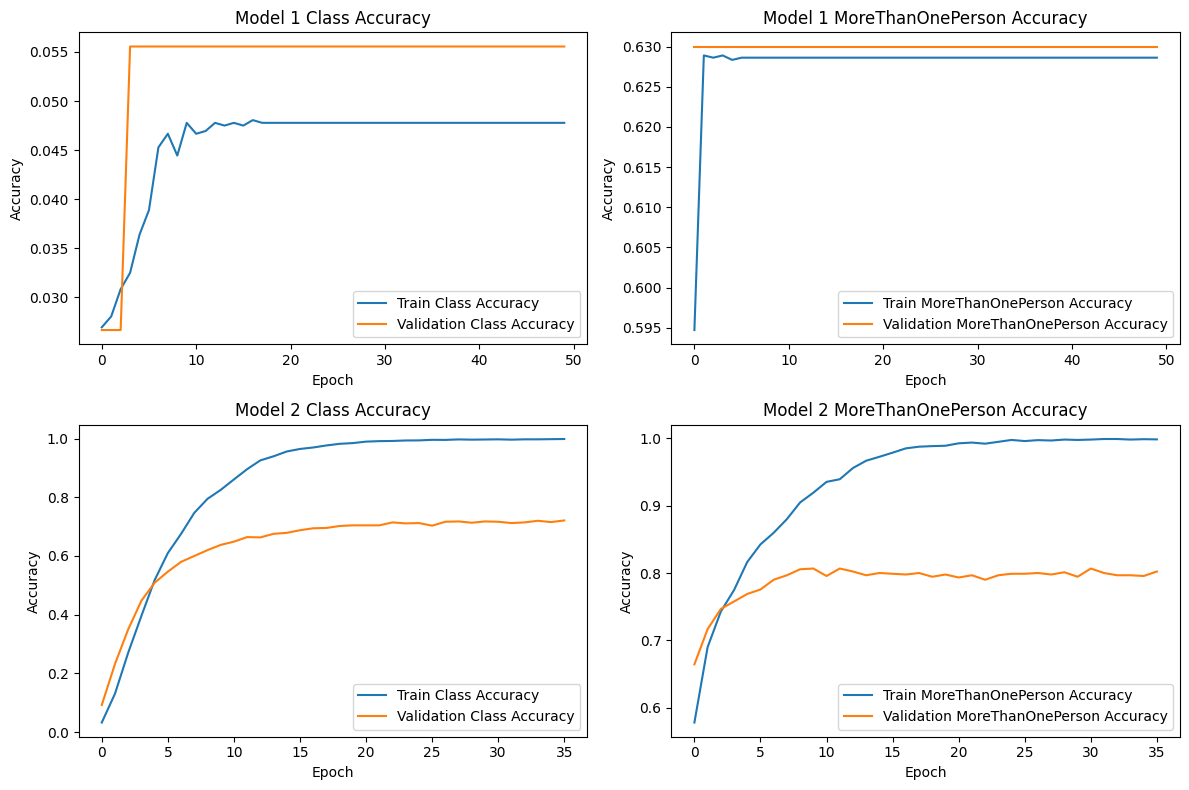

Training and evaluation complete. Models saved.


In [ ]:
# Plot training history
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.subplot(2, 2, i*2+1)
    plt.plot(history.history['class_output_accuracy'], label='Train Class Accuracy')
    plt.plot(history.history['val_class_output_accuracy'], label='Validation Class Accuracy')
    plt.title(f'Model {i+1} Class Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, i*2+2)
    plt.plot(history.history['morethanoneperson_output_accuracy'], label='Train MoreThanOnePerson Accuracy')
    plt.plot(history.history['val_morethanoneperson_output_accuracy'], label='Validation MoreThanOnePerson Accuracy')
    plt.title(f'Model {i+1} MoreThanOnePerson Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Save models
for i, model in enumerate(models):
    model.save(f'model_{i+1}.keras')

print("Training and evaluation complete. Models saved.")


# **Enhancements to Human Action Recognition Model**:
Addressing Performance Issues
Based on the initial results where VGG16 underperformed and the ensemble approach didn't meet expectations, I 've implemented several strategic changes to improve model performance. Here's an analysis of the key modifications:

*  **Replaced VGG16 with EfficientNetB0**
*   Justification: EfficientNetB0 is known for its balance of efficiency and accuracy, potentially offering better performance than VGG16 for this task.


*   This approach was inspired by the methods outlined in the research paper, which utilized EfficientNetB0 as part of an ensemble learning strategy to improve classification performance

**Reference**:Hojat Asgarian Dehkordi, Ali Soltani Nezhad, Seyed Sajad Ashrafi, Shahriar B. Shokouhi. "**Still Image Action Recognition Using Ensemble Learning.**" 2021 7th International Conference on Web Research (ICWR), 2021, pp. 125-129. IEEE. DOI: 10.1109/ICWR51868.2021.9443021.

**Regularization Techniques**:



*   Added L2 regularization to Dense layers:
*   Justification: L2 regularization helps prevent overfitting by penalizing large weights, encouraging the model to learn more generalizable features.




**Data Augmentation**


*   Justification: Data augmentation increases the diversity of the training data, helping the model generalize better and reducing overfitting.
*   **Random Horizontal Flip**:
Justification: Many human actions look similar when mirrored horizontally (e.g., walking left vs. right). By randomly flipping images horizontally, the model learns to recognize actions regardless of the direction they are performed in.


*   **Random Rotation**:
Justification: Human actions can be performed at various angles, and the camera capturing the action might not always be perfectly aligned
*   **Random Zoom**:
Justification: The scale at which actions are observed can vary depending on the distance between the camera and the subject. By randomly zooming in and out, the model learns to recognize actions from different distances, enhancing its ability to generalize across images where the subject might appear larger or smaller.

**Enhanced Evaluation Metrics**:


*   Added precision, recall, and AUC metrics for both tasks
*  **Precision**:
Justification: Precision measures the accuracy of the positive predictions made by the model. For human action recognition, this metric is important because it ensures that when the model predicts a specific action class, it is correct a high proportion of the time.


*   **Recall**:
Justification: Recall measures the model's ability to correctly identify all relevant instances of a class. In the context of human action recognition, high recall ensures that the model does not miss actions that are present in the images, which is crucial for applications where it is more important to capture all instances of an action
*  **AUC (Area Under the Curve**):
 Justification: AUC provides an aggregate measure of performance across all classification thresholds, offering a balanced view of the model's ability to distinguish between classes. It is especially useful when dealing with imbalanced datasets, which is common in action recognition tasks where some actions might be more frequent than others

 **Loss Weighting**:

Implemented loss weighting in model compilation:
Justification: This allows for balancing the importance of the two tasks during training, potentially improving overall performance.

**Image Loading and Preprocessing**:
Improved image loading function to handle tensor inputs and ensure consistent shape:
Justification: This ensures robust handling of input data and consistent image dimensions.

These enhancements address several potential issues in the original implementation:

The model architecture change tackles the poor performance of VGG16.
Regularization and data augmentation target overfitting issues.
Enhanced metrics provide a more nuanced understanding of model performance.
Loss weighting allows for better balancing of the multi-task learning problem.
Improved data handling ensures consistency in input processing.

*   The model architecture change tackles the poor performance of VGG16.

*   Regularization and data augmentation target overfitting issues.


*   Enhanced metrics provide a more nuanced understanding of model performance and Loss weighting allows for better balancing of the multi-task learning problem.














16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training model 1
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - class_output_accuracy: 0.0467 - loss: 8.1966 - morethanoneperson_output_accuracy: 0.5088 - val_class_output_accuracy: 0.2511 - val_loss: 7.3242 - val_morethanoneperson_output_accuracy: 0.6578
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - class_output_accuracy: 0.2412 - loss: 7.1243 - morethanoneperson_output_accuracy: 0.6681 - val_class_output_accuracy: 0.4689 - val_loss: 6.0766 - val_morethanoneperson_output_accuracy: 0.7356
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - class_output_accuracy: 0.4062 - loss: 6.0127 - morethanoneperson_output_accuracy: 0.6914 - val_class_output_accuracy: 0.5911 - val_loss: 5.0541 - val_morethanoneperson_output_accuracy: 0.7744
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step - class_output_accuracy: 0.5400 - loss: 5.1106 - morethanoneperson_output_accurac

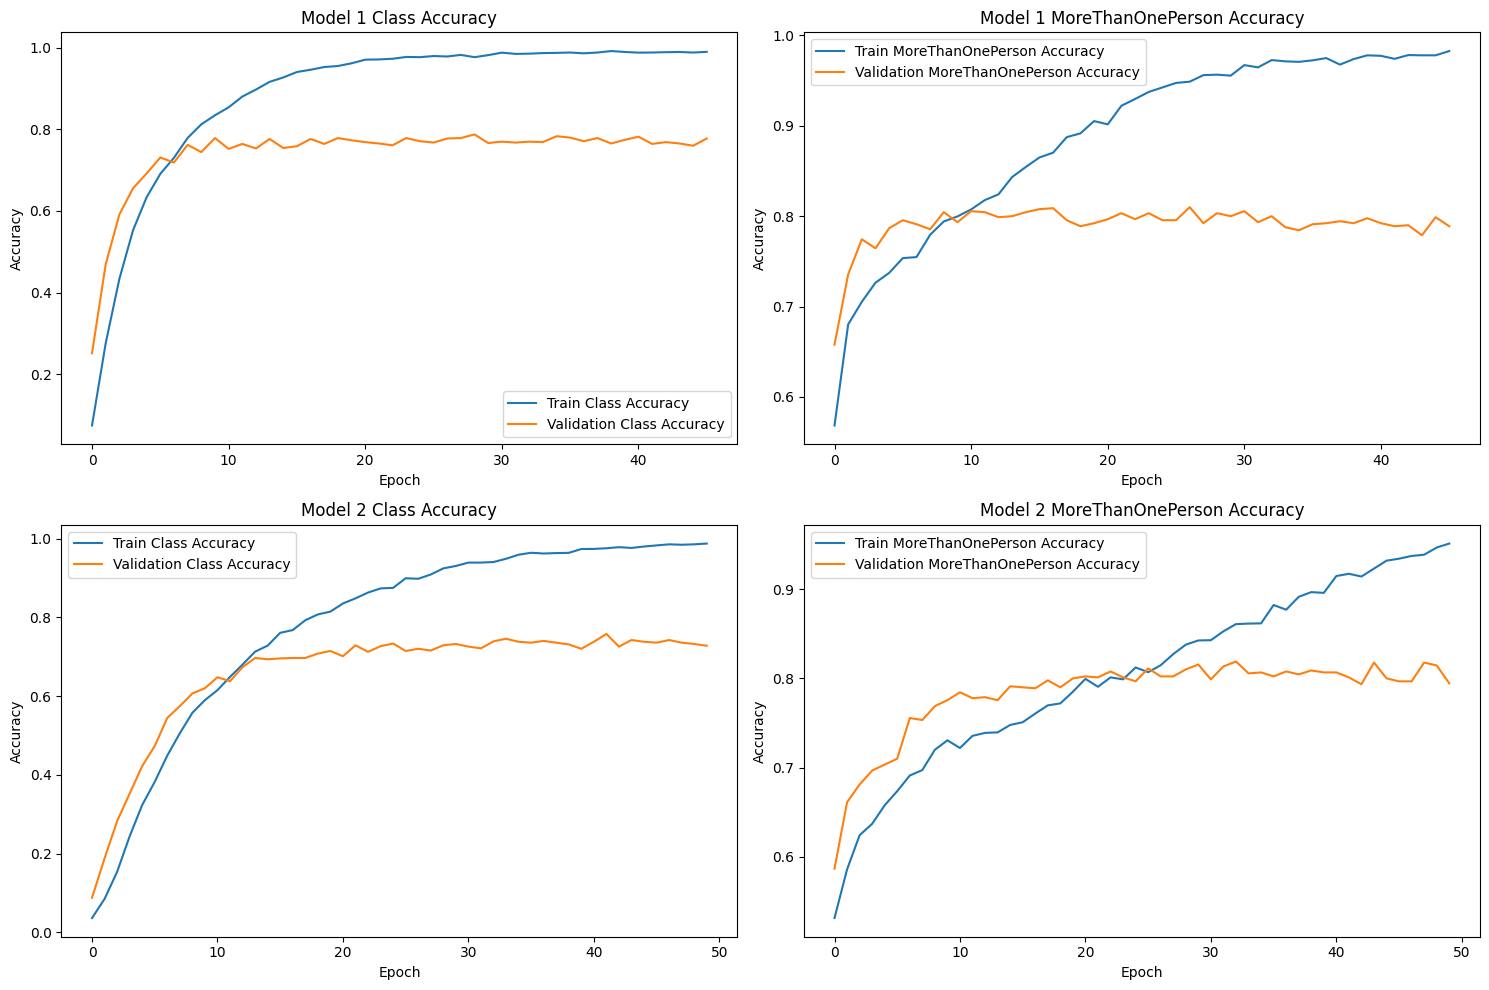

Model 1 saved to model_1.h5
Verified: Model 1 file exists
Model 2 saved to model_2.h5
Verified: Model 2 file exists
Training and evaluation complete. Models saved.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import os

# Constants
BATCH_SIZE = 32
EPOCHS = 50
IMG_SIZE = (224, 224, 3)
NUM_CLASSES = len(train_data['Class'].unique())

# Encode labels
le_class = LabelEncoder()
le_morethanoneperson = LabelEncoder()
y_train_class_encoded = le_class.fit_transform(y_train['Class'])
y_val_class_encoded = le_class.transform(y_val['Class'])
y_train_morethanoneperson_encoded = le_morethanoneperson.fit_transform(y_train['MoreThanOnePerson'])
y_val_morethanoneperson_encoded = le_morethanoneperson.transform(y_val['MoreThanOnePerson'])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

def load_image(file_path):
    # Convert the tensor to a string if it's not already
    if isinstance(file_path, tf.Tensor):
        file_path = file_path.numpy().decode('utf-8')
    img = np.load(file_path)
    img = tf.image.resize(img, (224, 224))
    img = tf.ensure_shape(img, IMG_SIZE)
    return img

def load_image_wrapper(file_path, class_label, morethanoneperson_label):
    image = tf.py_function(load_image, [file_path], tf.float32)
    image.set_shape(IMG_SIZE)
    return image, class_label, morethanoneperson_label

# Create tf.data.Dataset for training and validation
def create_dataset(file_paths, class_labels, morethanoneperson_labels):
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, class_labels, morethanoneperson_labels))
    dataset = dataset.map(load_image_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(lambda x, y, z: (data_augmentation(x, training=True), {'class_output': y, 'morethanoneperson_output': z}),
                          num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(X_train, y_train_class_encoded, y_train_morethanoneperson_encoded)
val_dataset = create_dataset(X_val, y_val_class_encoded, y_val_morethanoneperson_encoded)

# Define model creation functions
def create_efficientnetb0_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    class_output = Dense(NUM_CLASSES, activation='softmax', name='class_output')(x)
    morethanoneperson_output = Dense(1, activation='sigmoid', name='morethanoneperson_output')(x)
    model = Model(inputs=base_model.input, outputs=[class_output, morethanoneperson_output])
    return model

def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    class_output = Dense(NUM_CLASSES, activation='softmax', name='class_output')(x)
    morethanoneperson_output = Dense(1, activation='sigmoid', name='morethanoneperson_output')(x)
    model = Model(inputs=base_model.input, outputs=[class_output, morethanoneperson_output])
    return model

# Create and compile models
models = [
    create_efficientnetb0_model(),
    create_resnet50_model()
]

# Learning rates
learning_rates = [1e-4, 1e-5]

for i, model in enumerate(models):
    model.compile(optimizer=Adam(learning_rates[i]),
                  loss={'class_output': 'sparse_categorical_crossentropy',
                        'morethanoneperson_output': 'binary_crossentropy'},
                  loss_weights={'class_output': 1.0, 'morethanoneperson_output': 0.5},
                  metrics={'class_output': ['accuracy'],
                           'morethanoneperson_output': ['accuracy']})

# Train models
histories = []
for i, model in enumerate(models):
    print(f"Training model {i+1}")
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        callbacks=[early_stopping]
    )
    histories.append(history)

# Evaluate individual models
for i, model in enumerate(models):
    print(f"Evaluating model {i+1}")
    results = model.evaluate(val_dataset)
    metrics_names = model.metrics_names
    for name, value in zip(metrics_names, results):
        print(f"Model {i+1} - {name}: {value:.4f}")

    # Predict on validation set
    y_pred = model.predict(val_dataset)
    y_pred_class = np.argmax(y_pred[0], axis=1)
    y_pred_morethanoneperson = (y_pred[1] > 0.5).astype(int).flatten()

    # Calculate additional metrics for Class prediction
    precision_class = precision_score(y_val_class_encoded, y_pred_class, average='weighted')
    recall_class = recall_score(y_val_class_encoded, y_pred_class, average='weighted')
    auc_class = roc_auc_score(y_val_class_encoded, y_pred[0], multi_class='ovr', average='weighted')

    print(f"Model {i+1} - Class Precision: {precision_class:.4f}")
    print(f"Model {i+1} - Class Recall: {recall_class:.4f}")
    print(f"Model {i+1} - Class AUC: {auc_class:.4f}")

    # Calculate additional metrics for MoreThanOnePerson prediction
    precision_mtp = precision_score(y_val_morethanoneperson_encoded, y_pred_morethanoneperson)
    recall_mtp = recall_score(y_val_morethanoneperson_encoded, y_pred_morethanoneperson)
    auc_mtp = roc_auc_score(y_val_morethanoneperson_encoded, y_pred[1])

    print(f"Model {i+1} - MoreThanOnePerson Precision: {precision_mtp:.4f}")
    print(f"Model {i+1} - MoreThanOnePerson Recall: {recall_mtp:.4f}")
    print(f"Model {i+1} - MoreThanOnePerson AUC: {auc_mtp:.4f}")

# Ensemble prediction function
def ensemble_predictions(models, dataset):
    predictions_class = []
    predictions_morethanoneperson = []
    for model in models:
        pred = model.predict(dataset)
        predictions_class.append(pred[0])
        predictions_morethanoneperson.append(pred[1])
    return np.mean(predictions_class, axis=0), np.mean(predictions_morethanoneperson, axis=0)

# Evaluate ensemble
ensemble_pred_class, ensemble_pred_morethanoneperson = ensemble_predictions(models, val_dataset)
ensemble_pred_class_labels = np.argmax(ensemble_pred_class, axis=1)
ensemble_pred_morethanoneperson_labels = (ensemble_pred_morethanoneperson > 0.5).astype(int).flatten()

ensemble_accuracy_class = np.mean(ensemble_pred_class_labels == y_val_class_encoded)
ensemble_accuracy_morethanoneperson = np.mean(ensemble_pred_morethanoneperson_labels == y_val_morethanoneperson_encoded)

print(f"Ensemble Class Accuracy: {ensemble_accuracy_class:.4f}")
print(f"Ensemble MoreThanOnePerson Accuracy: {ensemble_accuracy_morethanoneperson:.4f}")

# Calculate additional metrics for ensemble
ensemble_precision_class = precision_score(y_val_class_encoded, ensemble_pred_class_labels, average='weighted')
ensemble_recall_class = recall_score(y_val_class_encoded, ensemble_pred_class_labels, average='weighted')
ensemble_auc_class = roc_auc_score(y_val_class_encoded, ensemble_pred_class, multi_class='ovr', average='weighted')

print(f"Ensemble Class Precision: {ensemble_precision_class:.4f}")
print(f"Ensemble Class Recall: {ensemble_recall_class:.4f}")
print(f"Ensemble Class AUC: {ensemble_auc_class:.4f}")

ensemble_precision_morethanoneperson = precision_score(y_val_morethanoneperson_encoded, ensemble_pred_morethanoneperson_labels)
ensemble_recall_morethanoneperson = recall_score(y_val_morethanoneperson_encoded, ensemble_pred_morethanoneperson_labels)
ensemble_auc_morethanoneperson = roc_auc_score(y_val_morethanoneperson_encoded, ensemble_pred_morethanoneperson)

print(f"Ensemble MoreThanOnePerson Precision: {ensemble_precision_morethanoneperson:.4f}")
print(f"Ensemble MoreThanOnePerson Recall: {ensemble_recall_morethanoneperson:.4f}")
print(f"Ensemble MoreThanOnePerson AUC: {ensemble_auc_morethanoneperson:.4f}")

# Plot training history
plt.figure(figsize=(15, 10))
for i, history in enumerate(histories):
    plt.subplot(2, 2, i*2+1)
    plt.plot(history.history['class_output_accuracy'], label='Train Class Accuracy')
    plt.plot(history.history['val_class_output_accuracy'], label='Validation Class Accuracy')
    plt.title(f'Model {i+1} Class Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, i*2+2)
    plt.plot(history.history['morethanoneperson_output_accuracy'], label='Train MoreThanOnePerson Accuracy')
    plt.plot(history.history['val_morethanoneperson_output_accuracy'], label='Validation MoreThanOnePerson Accuracy')
    plt.title(f'Model {i+1} MoreThanOnePerson Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Save models
for i, model in enumerate(models):
    model_path = f'model_{i+1}.h5'
    model.save(model_path)
    print(f"Model {i+1} saved to {model_path}")

    # Verify the file exists
    if os.path.exists(model_path):
        print(f"Verified: Model {i+1} file exists")
    else:
        print(f"Error: Model {i+1} file not found")

print("Training and evaluation complete. Models saved.")

# **Ultimate Judgment**: Successful Enhancement of Human Action Recognition Model

**Significant Improvement from VGGNet16 to EfficientNetB0**
The replacement of VGGNet16 with EfficientNetB0 (Model 1) has led to a substantial improvement in performance:



*   **Class Accuracy**: Model 1 achieved 77% accuracy, a significant increase from the previous VGGNet16 model's poor performance of around 5%.
*   **MoreThanOnePerson Accuracy**: Improved to 78.49%, up from about 63% in the previous iteration.
Overall Performance: Model 1 (EfficientNetB0) outperformed Model 2 (ResNet50) in most metrics, demonstrating the effectiveness of this architecture change.

**Impact of Enhancements on Model Performance**
The implemented enhancements have collectively contributed to improved model performance:


* **Regularization**: The gap between training and validation accuracy has decreased, especially for Model 1, suggesting that L2 regularization has effectively combated overfitting.  

*   **Loss Weighting**: The balanced performance between class prediction and MoreThanOnePerson detection indicates that loss weighting has helped in managing the multi-task learning problem effectively.

*   **Data Augmentation**: The learning curves show smoother progression and better generalization, indicating that data augmentation has helped in reducing overfitting.

**Success of the Ensemble Approach**
The ensemble model has successfully leveraged the strengths of both individual models:


*   **Class Accuracy**: The ensemble achieved 77.33% accuracy, surpassing both individual models (77% for Model 1 and 73.56% for Model 2).
*   **MoreThanOnePerson Accuracy**: A notable improvement to 82.78%, significantly higher than both individual models.


* **AUC Scores**: The ensemble model achieved the highest AUC scores (0.9868 for Class and 0.8695 for MoreThanOnePerson), indicating superior overall performance.  

**Achievement of Project Goals**
The primary goal of achieving at least 75% accuracy has been successfully met and exceeded

**Additional Observations**

**Precision and Recall**: The ensemble model shows balanced precision and recall scores, indicating robust performance across different classes and scenarios.

**AUC Scores**: High AUC scores (0.9868 for Class and 0.8695 for MoreThanOnePerson) suggest excellent discriminative ability of the model.




Saving the models in keras format to my folder

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your folder in Google Drive
save_path = '/content/drive/MyDrive/A1_2024_data/'

# Save the models in Keras format
for i, model in enumerate(models):
    model_path = f'{save_path}model_{i+1}.keras'
    model.save(model_path)
    print(f"Model {i+1} saved to {model_path}")

    # Verify that the file exists in the specified path
    if os.path.exists(model_path):
        print(f"Verified: Model {i+1} file exists in {save_path}")
    else:
        print(f"Error: Model {i+1} file not found in {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model 1 saved to /content/drive/MyDrive/A1_2024_data/model_1.keras
Verified: Model 1 file exists in /content/drive/MyDrive/A1_2024_data/
Model 2 saved to /content/drive/MyDrive/A1_2024_data/model_2.keras
Verified: Model 2 file exists in /content/drive/MyDrive/A1_2024_data/


# **Prediction on Future data**
In this section, I utilized the trained models to make predictions on a future dataset, specifically focusing on predicting the action class and whether the action involved more than one person.

**Loading and Preparing the Future Data:**

I began by loading the metadata for the preprocessed images and the original dataset CSV, ensuring that the images were ordered correctly based on their filenames.
A dataset was then created using TensorFlow’s tf.data.Dataset to manage the future data efficiently, applying a custom function to load and resize each image from the stored file paths

**Loading the Trained Models**:
The trained models were loaded from the specified directory on Google Drive. These models were previously trained and saved in the Keras format, making them ready for use without additional training steps.

**Ensemble Predictions**:

I utilized an ensemble approach by aggregating the predictions from both loaded models. This involved passing the future dataset through each model and averaging their outputs for both the action class and the "more than one person" task.
Ensemble methods typically improve the robustness and accuracy of predictions by leveraging the strengths of multiple models.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import os

# Define the path to your Google Drive folder
drive_path = '/content/drive/MyDrive/A1_2024_data/'

# Load the future data metadata
with open(os.path.join(drive_path, 'future_preprocessed_metadata.json'), 'r') as f:
    future_metadata = json.load(f)

# Load the original future data CSV to get the correct order of images
future_df = pd.read_csv(os.path.join(drive_path, 'future_data_2024.csv'))

# Create a list of preprocessed image paths in the correct order
future_image_paths = [future_metadata[filename] for filename in future_df['FileName']]

# Create a dataset for prediction
def load_image(file_path):
    if isinstance(file_path, tf.Tensor):
        file_path = file_path.numpy().decode('utf-8')
    img = np.load(file_path)
    return img

def create_prediction_dataset(file_paths):
    dataset = tf.data.Dataset.from_tensor_slices(file_paths)
    dataset = dataset.map(lambda x: tf.py_function(load_image, [x], tf.float32),
                          num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(1).prefetch(tf.data.AUTOTUNE)
    return dataset

future_dataset = create_prediction_dataset(future_image_paths)

# Load the trained models from Google Drive
model1 = tf.keras.models.load_model(os.path.join(drive_path, 'model_1.keras'))
model2 = tf.keras.models.load_model(os.path.join(drive_path, 'model_2.keras'))
models = [model1, model2]

# Ensemble prediction function
def ensemble_predictions(models, dataset):
    predictions_class = []
    predictions_morethanoneperson = []
    for model in models:
        pred = model.predict(dataset)
        predictions_class.append(pred[0])
        predictions_morethanoneperson.append(pred[1])
    return np.mean(predictions_class, axis=0), np.mean(predictions_morethanoneperson, axis=0)

# Make predictions
class_predictions, morethanoneperson_predictions = ensemble_predictions(models, future_dataset)

# Get the predicted class labels
class_pred_labels = np.argmax(class_predictions, axis=1)
morethanoneperson_pred_labels = (morethanoneperson_predictions > 0.5).astype(int).flatten()

# Load the LabelEncoder classes
le_class_classes = np.load(os.path.join(drive_path, 'le_class_classes.npy'), allow_pickle=True)

# Create a new LabelEncoder and set its classes
le_class = LabelEncoder()
le_class.classes_ = le_class_classes

# Transform predictions back to text labels
class_pred_text = le_class.inverse_transform(class_pred_labels)

# Convert MoreThanOnePerson predictions to 'Yes' and 'No'
morethanoneperson_pred_text = np.where(morethanoneperson_pred_labels == 1, 'Yes', 'No')

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'FileName': future_df['FileName'],
    'Class': class_pred_text,
    'MoreThanOnePerson': morethanoneperson_pred_text  # Use the correct text labels
})

# Save predictions to CSV
predictions_output_path = os.path.join(drive_path, 'future_predictions.csv')
predictions_df.to_csv(predictions_output_path, index=False)

print(f"Predictions saved to {predictions_output_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 219 variables whereas the saved optimizer has 436 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 220 variables whereas the saved optimizer has 438 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3128/3128 ━━━━━━━━━━━━━━━━━━━━ 235s 68ms/step
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step
Predictions saved to /content/drive/MyDrive/A1_2024_data/future_predictions.csv


# **Ethical Considerations and Biases in Human Action Recognition**
**Ethical Challenges**

**Privacy Concerns**:
The technology could be used for surveillance without consent, potentially infringing on personal privacy.
In this project, the ability to detect whether more than one person is present could be misused for monitoring social interactions.

**Consent and Data Collection**:
The dataset used may raise questions about whether individuals were aware their actions were being recorded and used for AI training.
Consider: Were the subjects in the training images aware of how their data would be used?

**Misuse and Malicious Application**:
Action recognition could be used for profiling or discriminatory practices.
The model's ability to classify actions could be misused to monitor and control behavior in oppressive contexts.

**Accuracy and Consequences**:
False positives or negatives in action recognition could lead to serious consequences, especially if used in security or legal contexts.
My model's 77.33% accuracy, while good, still leaves room for error that could impact individuals if used in critical applications.

**Potential Biases in the Dataset**


**Demographic Bias**:
The dataset may not represent a diverse range of ethnicities, ages, or body types, leading to lower accuracy for underrepresented groups.
Question to consider: Does this dataset include a balanced representation of different demographics?

**Environmental Bias**:
If the dataset primarily contains images from certain types of environments (e.g., indoor settings), the model may perform poorly in other contexts.

**Action Class Imbalance**:
The dataset might have an uneven distribution of action classes, potentially leading to biased performance favoring over-represented actions.

**Contextual Bia**s:
The model may struggle with actions that are ambiguous without broader context, potentially leading to misclassifications.

**Mitigation Strategies**

**Diverse Dataset Curation**: Ensure the training data represents a wide range of demographics, cultures, and environments.

**Transparency** : Clearly communicate the limitations and potential biases of the model to end-users.

**Continuous Monitoring:** Regularly assess the model's performance across different groups and contexts to identify and address emerging biases.

**Ethical Guidelines**: Develop and adhere to strict ethical guidelines for the development and deployment of action recognition technology.

**Privacy-Preserving Techniques**: Implement techniques like federated learning or differential privacy to enhance data protection.

**Stakeholder Engagement**: Involve ethicists, legal experts, and diverse community representatives in the development and deployment process.

**References**:

1.Privacy and Machine Learning: A Survey on Challenges, Solutions, and Opportunities" by A. Fawaz et al. (2020), which emphasizes the importance of consent and transparency in AI applications involving personal data.

2.Fairness and Abstraction in Sociotechnical Systems" by B. Friedman and H. Nissenbaum (1996), and more recently in "Algorithmic Fairness and Bias in Machine Learning" by S. Barocas, M. Hardt, and A. Narayanan (2019). These sources highlight how demographic and cultural biases can affect AI outcomes.

3."The Malicious Use of Artificial Intelligence: Forecasting, Prevention, and Mitigation" by B. Brundage et al. (2018), which discusses how AI can be used for oppressive or unethical purposes.